## DSTA 8-d

### Chapter IV - WWW, Wiki and Online social networks.

#### This __exercise__ notebook is taken from the notebook for Ch. 4 of Caldarelli-Cheesa's textbook (CC).

Please see the [class repository](https://www.dcs.bbk.ac.uk/~ale/dsta/) for the datasets and the __exercise notebook__.

In [90]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## How to get data from The Laboratoty for Web Algorithmics (http://law.di.unimi.it/)

### This is the page with the datasets: http://law.di.unimi.it/datasets.php

#### It is possible to download a network in a WebGraph format that is a compressed binary format. The project provides various clients to extract the network strcture, in Java, C++ and in Python, py-web-graph: http://webgraph.di.unimi.it/.

#### In particular we got the graph and the related urls associated to each node of the .eu domain in the year 2005: http://law.di.unimi.it/webdata/eu-2005/ . We exctracted the graph in a form of an edge list and we also got the file with the list of urls in the same order of the node_id

In [91]:
!head ./data/eu-2005.urls

http://de.osha.eu.int/de/gfx/statistics/EW2002_IBM_Massnahmen_gegen_Stress_am_Arbeitsplatz.php
http://de.osha.eu.int/de/print/statistics/EW2002_IBM_Massnahmen_gegen_Stress_am_Arbeitsplatz.php
http://de.osha.eu.int/de/gfx/statistics/EW2002_A_Boehm_Ausstieg_aus_dem_Arbeitsleben.php
http://de.osha.eu.int/de/print/statistics/EW2002_A_Boehm_Ausstieg_aus_dem_Arbeitsleben.php
http://de.osha.eu.int/de/gfx/statistics/EW2002_Motorola_Stresspraevention_u_Gesundheitsfoerderung.php
http://de.osha.eu.int/de/print/statistics/EW2002_Motorola_Stresspraevention_u_Gesundheitsfoerderung.php
http://de.osha.eu.int/de/gfx/statistics/EW2002_Motio_GmbH_Organisationsentwicklung_in_der_chemischen_Industrie.php
http://de.osha.eu.int/de/print/statistics/EW2002_Motio_GmbH_Organisationsentwicklung_in_der_chemischen_Industrie.php
http://de.osha.eu.int/de/print/statistics/EW2002_A_Boehm_Umbruch_im_Berufsleben.php
http://de.osha.eu.int/de/gfx/statistics/EW2002_A_Boehm_Umbruch_im_Berufsleben.php


In [92]:
!head ./data/eu-2005_1M.arcs

0	0
0	1
1	1
2	2
2	3
3	3
4	4
4	5
5	5
6	6


In [97]:
import networkx as nx
 
#defining the eu directed graph
eu_DG=nx.DiGraph()
#retrieve just the portion of the first 1M edges of the .eu domain 
#crawled in 2005
eu_DG=nx.read_edgelist('./data/eu-2005_1M.arcs', \
                       create_using=nx.DiGraph())
#generate the dictionary of node_is -> urls
file_urls=open('./data/eu-2005.urls')
count=0
dic_nodid_urls={}
while True:
    next_line=file_urls.readline()
    if not next_line:
        break
    next_line[:-1]
    dic_nodid_urls[str(count)]=next_line[:-1]
    count=count+1  
file_urls.close()

#generate the strongly connected component
scc=[(len(c),c) for c in sorted( nx.strongly_connected_components \
                               (eu_DG), key=len, reverse=True)][0][1]
eu_DG_SCC = eu_DG.subgraph(scc)


## Retrieving data through the  [Twitter API](https://dev.twitter.com/docs) usign the module [Twython](http://twython.readthedocs.org/en/latest/)

In [79]:
#To get your own KEYS and TOKENS visit the following page:
#https://dev.twitter.com/docs/auth/tokens-devtwittercom 
#(you have to sign in before with your Twitter account)
#!pip install twython
from twython import Twython

# put the credentials of @your_account
APP_KEY='vxcStSP88tL77rpBSLa9IMoIr'
APP_SECRET='7EP7CTDzN6mzvSv1s0JJo2WrHowFP6MyEe9F27aCbLNbrlWdZR'
OAUTH_TOKEN='14489299-9SfKo957lp3a13f7HNAbufv6084VTMwT70OHJv5er'
OAUTH_TOKEN_SECRET='wBPOdudXfZ9Pf9swb2rkXYSWBSmyo4VdUr83IodPhX6TZ'

#this will be the handle to connect with Twitter
twitter_connection=Twython(APP_KEY, APP_SECRET, \
                           OAUTH_TOKEN,OAUTH_TOKEN_SECRET)

### How to get the timeline

In [80]:
#the following tweets and query results
#depend on the KEYS and TOKENS of the user

res=twitter_connection.get_home_timeline()
for t in res[:5]:
    #print the text of the first 5 tweets of the actual timeline
    print ('Text of the tweet:',t[u'text'])
    #for each tweet print the mentioned users
    print ('mentions:',)
    for m in t[u'entities'][u'user_mentions']:
        print (m[u'screen_name'],)
    print ('\r')

Text of the tweet: Qui si comunica che, per la prima volta dal lockdown, a Torino la Polizia di Stato ha iniziato a fare annunci per l… https://t.co/N5yBsrg3ov
mentions:

Text of the tweet: RT @CIA: Before serving in the OSS, Maria Gulovich was a Slovakian school teacher protecting her Jewish friends &amp; neighbors from the Nazis.…
mentions:
CIA

Text of the tweet: RT @ItalianAirForce: 1920, anno storico per il mondo dell'aviazione.
Fu portato a termine il raid Roma - Tokyo da Ferrarin e Masiero che, c…
mentions:
ItalianAirForce

Text of the tweet: «Ossessione anti-russa», ribatte il Cremlino https://t.co/0HzwNWxZUb
mentions:

Text of the tweet: A supercut of the best Jackie and Kevin moments from the first season of Draw-Off.  

Watch new episodes of Draw-Of… https://t.co/YnzYpuJx4f
mentions:



### How to get user information

In [81]:
res=twitter_connection.show_user(screen_name='@BarackObama')
print (res)
print ('location: ',res[u'location'])
print ('number of followers: ',res['followers_count'])

{'id': 813286, 'id_str': '813286', 'name': 'Barack Obama', 'screen_name': 'BarackObama', 'location': 'Washington, DC', 'profile_location': None, 'description': 'Dad, husband, President, citizen.', 'url': 'https://t.co/93Y27HEnnX', 'entities': {'url': {'urls': [{'url': 'https://t.co/93Y27HEnnX', 'expanded_url': 'https://www.obama.org/', 'display_url': 'obama.org', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 114159449, 'friends_count': 608481, 'listed_count': 229503, 'created_at': 'Mon Mar 05 22:08:25 +0000 2007', 'favourites_count': 11, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': True, 'statuses_count': 15743, 'lang': None, 'status': {'created_at': 'Tue Mar 17 16:49:38 +0000 2020', 'id': 1239957076211834881, 'id_str': '1239957076211834881', 'text': 'We owe a profound debt of gratitude to all our health professionals and everybody who’ll be on the front lines of t… https://t.co/pLJkvANSdr', 'truncated': True, 'e

### Retrieving [tweets](https://dev.twitter.com/docs/platform-objects/tweets) with the '[search](https://dev.twitter.com/docs/api/1.1/get/search/tweets)' function ([parameter q](https://dev.twitter.com/docs/using-search))

In [82]:
res=twitter_connection.search(q='#ebola', count=2)
for t in res['statuses']:
    print ("Text of the tweet:",t[u'text'])

Text of the tweet: RT @ChinaEmbTurkey: Çin Merkez Televizyonu'ndan alınan habere göre,Çin'in en iyi epidemiyoloğu Chen Wei'nin liderliğindeki tıbbi ekip taraf…
Text of the tweet: RT @steve_hanke: The @WHO's lackluster response to #Ebola and #SARS exacerbated both outbreaks. The same is happening with the #Coronavirus…


## Hits algorithm

### Test Graph

{'A': 0.31622776601683794, 'B': 0.6324555320336759, 'C': 0.31622776601683794, 'D': 0.6324555320336759}
{'A': 0.7302967433402215, 'B': 0.18257418583505539, 'C': 0.5477225575051661, 'D': 0.36514837167011077}


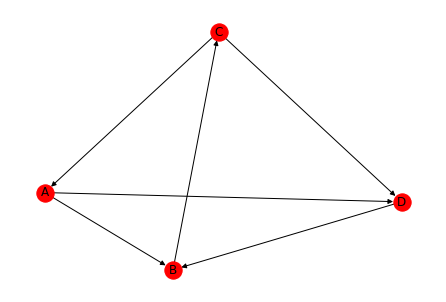

In [83]:
def HITS_algorithm(DG):
    auth={}
    hub={}

    k=1000 #number of steps

    for n in DG.nodes():
        auth[n]=1.0
        hub[n]=1.0

    for k in range(k):
        norm=0.0
        for n in DG.nodes():
            auth[n]=0.0
            for p in DG.predecessors(n):
                auth[n]+=hub[p]
            norm+=auth[n]**2.0
        norm=norm**0.5
        for n in DG.nodes():
            auth[n]=auth[n]/norm

        norm=0.0
        for n in DG.nodes():
            hub[n]=0.0
            for s in DG.successors(n):
                hub[n]+=auth[s]
            norm+=hub[n]**2.0  
        norm=norm**0.5
        for n in DG.nodes():
            hub[n]=hub[n]/norm
        
        return auth,hub

DG=nx.DiGraph()

DG.add_edges_from([('A','B'),('B','C'),('A','D'), \
                   ('D','B'),('C','D'),('C','A')])

#plot the graph
nx.draw(DG,with_labels=True)

(auth,hub)=HITS_algorithm(DG)

print (auth)
print (hub)

# Q1.  Use built in hits function to find hub and authority scores. Can you spot the differences in result? 

Hub Scores:  {'A': 0.44504186825960695, 'B': 1.9336832073590722e-13, 'C': 0.35689586676523016, 'D': 0.19806226497496957}
Authority Scores:  {'A': 0.19806226306818242, 'B': 0.3568958695205176, 'C': 3.484376742610991e-13, 'D': 0.4450418674109515}


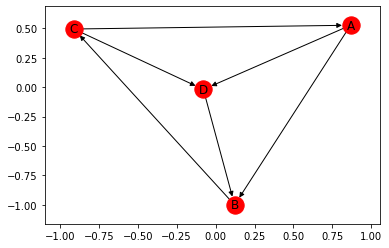

In [103]:
nx.draw_networkx(DG, with_labels = True) 
  
hubs, authorities = nx.hits(DG, max_iter = 1000, normalized = True) 
# The in-built hits function returns two dictionaries keyed by nodes 
# containing hub scores and authority scores respectively. 
  
print("Hub Scores: ", hubs) 
print("Authority Scores: ", authorities) 

### Adjacency matrix representation with basic operations

In [72]:
def matrix_transpose(M):
    M_out=[]
    for c in range(len(M[0])):
        M_out.append([])
        for r in range(len(M)):
            M_out[c].append(M[r][c])
    return M_out
            

def matrix_multiplication(M1,M2):
    M_out=[]
    for r in range(len(M1)):
        M_out.append([])
        for j in range(len(M2[0])):
            e=0.0
            for i in range(len(M1[r])):
                e+=M1[r][i]*M2[i][j]
            M_out[r].append(e)
    return M_out
            

adjacency_matrix1=[
                  [0,1,0,1],
                  [1,0,1,1],
                  [0,1,0,0]
                  ]

adjacency_matrix2=matrix_transpose(adjacency_matrix1)

print ("Transpose adjacency matrix:",adjacency_matrix2)

res_mul=matrix_multiplication(adjacency_matrix1,adjacency_matrix2)

print ("Matrix multiplication:",res_mul)


Transpose adjacency matrix: [[0, 1, 0], [1, 0, 1], [0, 1, 0], [1, 1, 0]]
Matrix multiplication: [[2.0, 1.0, 1.0], [1.0, 3.0, 0.0], [1.0, 0.0, 1.0]]


### Power iteration algorithm

In [73]:
adjacency_matrix=[
                  [0,1,0,1],
                  [1,0,1,1],
                  [0,1,0,0],
                  [1,1,0,0]
                  ]
vector=[
        [0.21],
        [0.34],
        [0.52],
        [0.49]
        ]

for i in range(100): #100 iterations is enough for the convergence!
    res=matrix_multiplication(adjacency_matrix,vector)
    norm_sq=0.0
    for r in res:
        norm_sq=norm_sq+r[0]*r[0]
    vector=[]
    for r in res:
         vector.append([r[0]/(norm_sq**0.5)])
    
print ("Maximum eigenvalue (in absolute value):",norm_sq**0.5)
print ("Eigenvector for the maximum eigenvalue:",vector)


Maximum eigenvalue (in absolute value): 2.1700864866260337
Eigenvector for the maximum eigenvalue: [[0.5227207256439814], [0.6116284573553772], [0.2818451988548684], [0.5227207256439814]]


### Computing the HITS algorithm onto the WWW strongly connected component of the .eu domain

In [105]:
import operator
print(eu_DG_SCC)
(auth,hub)=HITS_algorithm(eu_DG_SCC)
sorted_auth = sorted(auth.items(), key=operator.itemgetter(1))
sorted_hub = sorted(hub.items(), key=operator.itemgetter(1))

#top ranking auth
print ("Top 5 auth")
for p in sorted_auth[:5]:
    print (dic_nodid_urls[p[0]],p[1])
    
#top ranking hub
print ("\nTop 5 hub")
for p in sorted_hub[:5]:
    print (dic_nodid_urls[p[0]],p[1])


Top 5 auth
http://www.etf.eu.int/WebSite.nsf/968a6d6b85b25f2ac1256aea002ccb2a/ab332295e22aac65c1256b9e0035bf50?OpenDocument 9.674263879950006e-05
http://europa.eu.int/ploteus/portal/home.jsp?language=fr_FR 9.674263879950006e-05
http://ue.eu.int/cms3_applications/Applications/newsRoom/related.asp?BID=73&GRP=870&LANG=8&cmsId=359 9.674263879950006e-05
http://www.etf.eu.int/website.nsf/FichesList?ReadForm&LAN=EN&Key=Mediterranean+Region~~Egypt 9.674263879950006e-05
http://curia.eu.int/en/coopju/index.htm 9.674263879950006e-05

Top 5 hub
http://ue.eu.int/showPage.asp?id=370&lang=pt&mode=g 7.65711101120921e-07
http://leonardo.cec.eu.int/ 7.65711101120921e-07
http://libserver.cedefop.eu.int:4505/ALEPH/-/start/ced01 7.65711101120921e-07
http://www.europarl.eu.int/interp/public/default_en.htm 7.65711101120921e-07
http://ue.eu.int/cms3_fo/showPage.asp?id=604&lang=pt&mode=g 7.65711101120921e-07


# Q2.  Use built in hits function to find hub and authority scores. Can you spot the differences in result? 

In [107]:
import operator
#print(eu_DG_SCC)
hub, auth= nx.hits(eu_DG_SCC, max_iter = 50, normalized = True) 
#(auth,hub)=HITS_algorithm(eu_DG_SCC)
sorted_auth = sorted(auth.items(), key=operator.itemgetter(1))
sorted_hub = sorted(hub.items(), key=operator.itemgetter(1))

#top ranking auth
print ("Top 5 auth")
for p in sorted_auth[:5]:
    print (dic_nodid_urls[p[0]],p[1])
    
#top ranking hub
print ("\nTop 5 hub")
for p in sorted_hub[:5]:
    print (dic_nodid_urls[p[0]],p[1])

Top 5 auth
http://libserver.cedefop.eu.int/F/-/start/ced01 5.775829538579105e-106
http://ue.eu.int/cms3_applications/Applications/newsRoom/GalleryViewer.asp?command=VIEW_BYDATE&BID=80&TOPIC=NODESCRIPTION&LANG=8&cmsid=580 5.775829538579105e-106
http://www.europarl.eu.int/interp/public/careers/careers_en.htm 5.775829538579105e-106
http://libserver.cedefop.eu.int/F/-/start/vetir 5.775829538579105e-106
http://ue.eu.int/cms3_applications/applications/newsRoom/loadBook.asp?BID=92&LANG=8&cmsid=357 5.775829538579105e-106

Top 5 hub
http://ue.eu.int/showPage.asp?id=370&lang=pt&mode=g 1.086166690662644e-108
http://leonardo.cec.eu.int/ 1.086166690662644e-108
http://libserver.cedefop.eu.int:4505/ALEPH/-/start/ced01 1.086166690662644e-108
http://www.europarl.eu.int/interp/public/default_en.htm 1.086166690662644e-108
http://ue.eu.int/cms3_fo/showPage.asp?id=604&lang=pt&mode=g 1.086166690662644e-108


## Compute the PageRank

In [30]:
def pagerank(graph, damping_factor=0.85, max_iterations=100, 
min_delta=0.00000001):
    
    nodes = graph.nodes()
    graph_size = len(nodes)
    if graph_size == 0:
        return {}
    
    # itialize the page rank dict with 1/N for all nodes
    pagerank = dict.fromkeys(nodes, (1.0-damping_factor)*1.0/ \
                             graph_size)
    min_value=(1.0-damping_factor)/len(nodes)
    
    for i in range(max_iterations):
        diff = 0 #total difference compared to last iteraction
        # computes each node PageRank based on inbound links
        for node in nodes:
            rank = min_value
            for referring_page in graph.predecessors(node):
                rank += damping_factor * pagerank[referring_page]/ \
                len(list(graph.neighbors(referring_page)))
            diff += abs(pagerank[node] - rank)
            pagerank[node] = rank
        
        #stop if PageRank has converged
        if diff < min_delta:
            break
    
    return pagerank

## PageRank for a test Network (and with [Networkx](http://networkx.github.io/documentation/latest/reference/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html))

{1: 0.17359086186340225, 2: 0.33260446516778386, 3: 0.3202137953926163, 4: 0.17359086304186191}
{1: 0.17359061775974502, 2: 0.33260554622228633, 3: 0.3202132182582236, 4: 0.17359061775974502}


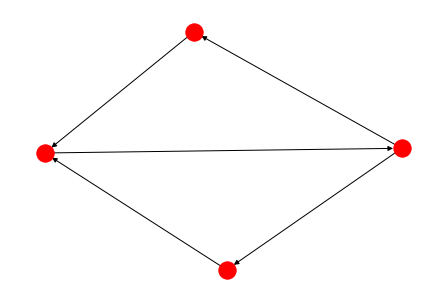

In [31]:
G=nx.DiGraph()
G.add_edges_from([(1,2),(2,3),(3,4),(3,1),(4,2)])
#plot the network
nx.draw(G)

#our Page Rank algorithm
res_pr=pagerank(G,max_iterations=10000,min_delta=0.00000001, \
                damping_factor=0.85)
print (res_pr)

#Networkx Pagerank function
print (nx.pagerank(G,max_iter=10000))

## Generate and plot the Twitter Mention Network

In [34]:
def generate_network(list_mentions):
    DG=nx.DiGraph()
    for l in list_mentions:
        if len(l)<2: continue
        for n in l[1:]:
             if not DG.has_edge(l[0],n):
                DG.add_edge(l[0],n, weight=1.0 )
        else:
                DG[l[0]][n]['weight']+=1.0
    return DG

#extracting user and mentions for each tweet
res=twitter_connection.search(q='#FutureDecoded', count=5000)
#the first will be the tweer user
list_users={}
list_mentions=[]
for t in res['statuses']:
    list_unique_ids=[]
    print ("User Screen Name and Id:",(t[u'user'][u'screen_name'], \
                                      t[u'user'][u'id_str']))
    list_unique_ids.append(t[u'user'][u'id_str'])
    if not t[u'user'][u'id_str'] in list_users:
        list_users[t[u'user'][u'id_str']]=t[u'user'][u'screen_name']
    print ("List of Mentions:",)
    for m in t[u'entities'][u'user_mentions']:
        if m['id_str']!=t[u'user'][u'id_str']:
                list_unique_ids.append(m['id_str'])
                if not m['id_str'] in list_users:
                    list_users[m['id_str']]=m[u'screen_name']
        print (m[u'screen_name'],m['id_str']),
    print ("\r")
    print (list_unique_ids)
    list_mentions.append(list_unique_ids)
    print ("\n")            

net_mentions=generate_network(list_mentions) 



User Screen Name and Id: ('SanjuBhatnagar9', '1213420413939638272')
List of Mentions:
MicrosoftIndia 37942193

['1213420413939638272', '37942193']


User Screen Name and Id: ('Shadabq96067325', '1219319509409906688')
List of Mentions:
MicrosoftIndia 37942193

['1219319509409906688', '37942193']


User Screen Name and Id: ('bindiya_garg', '1184776234615525377')
List of Mentions:
MicrosoftIndia 37942193

['1184776234615525377', '37942193']


User Screen Name and Id: ('alex31602258', '1240106701589590016')
List of Mentions:
MicrosoftIndia 37942193

['1240106701589590016', '37942193']


User Screen Name and Id: ('virani_09', '1239541580089851906')
List of Mentions:
MicrosoftIndia 37942193

['1239541580089851906', '37942193']


User Screen Name and Id: ('BHARAT__SURYA', '880045124042076161')
List of Mentions:
MicrosoftIndia 37942193

['880045124042076161', '37942193']


User Screen Name and Id: ('Jaswind94140764', '1231476878067847169')
List of Mentions:
MicrosoftIndia 37942193

['123147687

### Top Pageranks on the Twitter generated Network (influencers)

In [37]:
pr=nx.pagerank(net_mentions,max_iter=10000)
sorted_pr=sorted(pr.items(), key=operator.itemgetter(1),reverse=True)
#top10 pagerank twitter user from the selected search
for page in sorted_pr[:10]:
    print (list_users[page[0]],page[1])

MicrosoftIndia 0.45519696079977523
FlashTweet 0.010300672229389986
SanjuBhatnagar9 0.005567732989279501
Shadabq96067325 0.005567732989279501
bindiya_garg 0.005567732989279501
alex31602258 0.005567732989279501
virani_09 0.005567732989279501
BHARAT__SURYA 0.005567732989279501
Jaswind94140764 0.005567732989279501
DeepakP48831698 0.005567732989279501


## Community Detection for the scwiki web graph

In [60]:
#load the directed and undirected version og the scwiki graph
scwiki_pagelinks_net_dir=nx.read_edgelist \
("./data/scwiki_edgelist.dat",create_using=nx.DiGraph())
scwiki_pagelinks_net=nx.read_edgelist("./data/scwiki_edgelist.dat")

#load the page titles
diz_titles={}
file_titles=open("./data/scwiki_page_titles.dat",'r')
while True:
    next_line=file_titles.readline()
    if not next_line:
        break
    print (next_line.split()[0],next_line.split()[1])
    diz_titles[next_line.split()[0]]=next_line.split()[1]
    
file_titles.close()

14209 "Weird_Al"_Yankovic
13890 ''Assandira''
10258 'O_sole_mio
2361 'Onne
6118 (Sittin'_on)_The_Dock_of_the_Bay
6119 (Sittin'_on)_the_Dock_of_the_Bay
10062 ...altrimenti_ci_arrabbiamo!
11039 1054
11019 1065
16053 1082
11222 1090
12579 1096
11596 1100
16054 1110
16055 1138
11307 113_(nùmeru_de_emerzèntzia)
16056 1166
10560 118_-_Servìtziu_de_emerzèntzia_sanidària
16057 1194
11598 1200
16058 1222
16059 1250
16060 1278
16061 1306
15041 1315
10934 1324
16062 1334
13534 1336
12350 1340
15040 1343
16063 1362
15039 1371
16064 1390
15038 1399
11590 1409
16065 1418
15037 1427
11067 1431
12108 1444
16066 1446
15036 1455
11054 1473
16067 1474
13112 1483
10971 1489
13533 1490
11055 1492
12135 1497
16068 1502
11221 1510
10965 1514
11099 1515
13113 1520
13500 1530
12079 1533
13499 1542
13516 1543
12078 1580
12130 1584
10970 1588
10967 1596
10961 1599
13498 1600
11321 1608
13204 1616
13497 1627
10963 1667
10968 1669
11049 1685
13535 1711
12362 1713
11100 1720
13519 1724
11048 1750
12361 1753
11094 1

7659 Giovanni_Bosco
5883 Giovanni_Caboto
13572 Giovanni_Casu
13388 Giovanni_Columbu
8789 Giovanni_Falcone
4247 Giovanni_Francesco_Fara
10243 Giovanni_Lilliu
14133 Giovanni_Maria_Angioy
14020 Giovanni_Nepomuceno
8106 Giovanni_Palatucci
9829 Giovanni_Papini
7126 Giovanni_Pintori
14237 Giovanni_Ribisi
4558 Giovanni_Spano
7824 Giovanni_da_Capestrano
12998 Gioventura_Piemontèisa
6686 Giovia
6165 Giraffa
6164 Girasole
9379 Girolamo_Araolla
7915 Girolamo_De_Angelis
10622 Girolamo_Emiliani
3480 Girona
3451 Giru_de_is_Fiandras
6091 Giru_de_is_Fiandras/campidanesu
7716 Giuanne_Battista
9361 Giuanne_Battista_Scalabrini
12945 Giuanne_Bosco
7414 Giuanne_Crisostomo
12775 Giuanne_Matzeu_Garipa
10829 Giuanne_de_Nepomuk
8491 Giubileu
13804 Giudigadu_de_Gallura
11235 Giuigados_sardos
13802 Giuigadu_de_Arborea
13803 Giuigadu_de_Calaris
3663 Giuigadu_de_Gaddura
8979 Giuigadu_de_Gallura
13801 Giuigadu_de_Torres
5110 Giuliana
8263 Giuliano_Cabitza
9984 Giulio_Aleni
10309 Giulio_Angioni
12338 Giulio_Carlo_Ar

5736 Quercus
5423 Quercus_ilex
14106 Quidditas
3743 Quino
12219 Quintino_Sella
12051 Quinto_Orazio_Flacco
11995 Quiritas
10246 Qumran
13727 Québec
13281 Québec_(tzitade)
8330 Rabano_Mauro
4226 Rabia_Kazan
11683 Radical_chic
11480 Radio_Studio_54_Network
8128 Radiohead
11730 Radiuistimadore
9960 Rafael_Correa
13049 Rafael_Sari
10878 Rafaele_Arzu
8776 Raffaele_Pisu
10424 Raffaello_Sanzio
3694 Raffreddore
3695 Raffreddori
7220 Ragtime
12188 Rai
2052 Raimondo_Carta_Raspi
7931 Raimondo_D'Aronco
7932 Raimondo_Tommaso_D'Aronco
8280 Raimondo_de_Pegnafort
9230 Rainer_Werner_Fassbinder
10696 Raleigh
8468 Ram_Narayan
8783 Rana
9721 Rancagua
8302 Rangoon
9603 Rapallo
8786 Ravanella
7852 Ravenna
7692 Ravi_Shankar
9197 Ray_Brown
8001 Raymond_Burr
6975 Raymond_Queneau
14269 Real_Valladolid
12098 Rebolussione_de_pannarrigada
11675 Rebolussione_rumena
9521 Recco
10191 Reducciones_de_su_Paraguay
13902 Referendum_consultivu_sardu_de_su_2011
12385 Referendum_online_pro_s'indipendentzia_veneta_(2014)
11824

9454 Philippe_(WMF)
3956 Phlyming
6819 Pietro
9024 Pilif12p
12995 Pinus
2982 PipepBot
9729 PixelBot
10660 Place_Clichy
9442 Pmlineditor/common.js
8421 Pmlineditor/monobook.js
11046 Pratyya_Ghosh
11466 Pratyya_Ghosh/common.js
12996 Prenn
8422 Prince_Kassad
10072 Psubhashish
4278 Ptbotgourou
4773 Pudderigheddu
10139 Pundit
3399 Purbo_T
2704 Purodha
2806 Putnik
3952 Pwjb
7729 Pymouss
9077 Quentinv57
9342 Quentinv57/vector.js
10843 QuiteUnusual/common.js
16126 Qwed117
1057 RCBot~scwiki
3008 Rabascius
12604 Racconish
3106 Rael_86
13686 Ralgis
11827 Randykitty
5091 Razorflame
9171 RedBot
9854 Reder
13269 Rei_Momo
3944 Remi0o
11741 Renessaince/common.js
10497 Restu20
10496 Restu20/common.js
13410 ReviWiki
2673 ReyBrujo
2674 ReyBrujo/Dumps
2675 ReyBrujo/Dumps/20070228
2678 ReyBrujo/Dumps/20070228/Articles_with_more_than_1_external_links
2679 ReyBrujo/Dumps/20070228/Sites_linked_more_than_1_times
2692 ReyBrujo/Dumps/20070407
2693 ReyBrujo/Dumps/20070407/Articles_with_more_than_2_external_links


5882 Samatzai-Istema.png
9711 San_Colombano_Certenoli-Istema.png
9713 Sanremo-Istema.png
6100 Sant'Andrea_Frius-Istema.png
9602 Santa_Margherita_Ligure-Istema.png
9731 Santo_Stefano_d'Aveto-Istema.png
9672 Santu_'Asili-Istema.png
9599 Santu_Lussurgiu-Stemma.png
9571 Santu_Tommasu_dae_Biddanoa.JPG
9511 Sassari-Stemma2.png
3233 Savagesword24_07.jpg
9579 Semestene-Stemma.png
6098 Serri-Istema.png
9666 Sestri_Levante-Istema.png
12571 Sestu-Istemma.png
13110 Simaghis-Istemma.png
9517 Sori-Stemma.png
9510 Stemma-Savona.jpg
12588 Su_Coccu.JPG
11133 Tcs_1.jpg
11134 Tcs_2.jpg
7977 Tempio_di_Antas.jpg
1067 Temugin73.jpg
9779 Terranoa-Istema.png
9562 Tertenia-Stemma.png
7235 Teulada-Stemma.png
9797 Torriglia-Istema.png
4206 Transmission.png
1912 Tresnuraghes-Istema.png
9765 Tribogna-Istema.png
4874 Ulassa-logo.png
3225 Unity_000-00fc.jpg
9784 Uscio-Istema.png
11128 VIDEOLINA_SAT.jpg
7546 Varese-Stemma.png
11129 Videolina.jpg
11131 Videolina_2.jpg
11130 Videolina_old.jpg
9561 Villanova_Tulo-Stemma